# samples generation

In [5]:
import os
import numpy as np


class MakeDataset:
    """Class to make a dataset of mages with n points not overlapping"""
    def __init__(self, img_size, point_size, n_points_range, n_images, sigma=0.22, mu=0., mag_factor_range=(1, 2), padding=0):
        self.img_size = img_size - 2 * padding
        self.img_size_total = img_size
        self.pad = padding
        self.point_size = point_size
        self.n_points_range = n_points_range
        self.sigma = sigma
        self.mu = mu
        self.mag_factor_range = mag_factor_range
        self.n_images = n_images

        self.data_created = False

        self.images_ = np.zeros((self.n_images, self.img_size_total, self.img_size_total))
        self.images_noisy_ = np.zeros((self.n_images, self.img_size_total, self.img_size_total))

        self.images_dict_ = {}

    @staticmethod
    def _gaussian_matrix(point_size, sigma, mu):
        img_size, sigma, mu = point_size, sigma, mu

        x, y = np.meshgrid(np.linspace(-1, 1, img_size + 1), np.linspace(-1, 1, img_size + 1))
        d = np.sqrt(x * x + y * y)
        g = np.exp(-((d - mu) ** 2 / (2.0 * sigma ** 2)))

        return g

    def _make_sample(self, n_points, point_patch_sml, point_patches_big, point_patch_size, stride_fraction=2):
        image_sml = np.zeros((self.img_size, self.img_size))
        image_big = np.zeros((self.img_size, self.img_size))
        pps = int(round(point_patch_size/stride_fraction))
        ppc = np.ceil(point_patch_size / 2)  # point_patch_center
        ppr = np.floor(point_patch_size / 2)  # point_patch_radius

        x = np.arange(ppc, self.img_size - ppc, pps)
        x = np.repeat(x, len(x))
        np.random.shuffle(x)
        y = np.arange(ppc, self.img_size - ppc, pps)
        y = np.repeat(y, len(y))
        np.random.shuffle(y)
        
        
        
        if n_points > len(x):
            print("too many poinits")
            return
        
        
        
        for i in np.arange(n_points):
            
            min_y = int(y[i] - ppr)
            max_y = int(y[i] + ppr + 1)

            min_x = int(x[i] - ppr)
            max_x = int(x[i] + ppr + 1)

            #print(min_y, max_y, min_x, max_x)

            image_sml[min_y:max_y, min_x: max_x] += point_patch_sml
            image_big[min_y:max_y, min_x: max_x] += point_patches_big[i]

        image_sml_padded = np.pad(image_sml, ((self.pad, self.pad), (self.pad, self.pad)), "constant")
        image_big_padded = np.pad(image_big, ((self.pad, self.pad), (self.pad, self.pad)), "constant")
        return image_sml_padded, image_big_padded

    def make_n_samples(self, n_images=None, stride_fraction=2):
        if n_images is not None:
            n_samples = n_images
        else:
            n_samples = self.n_images
        
        n_mag_factors=30
        mag_factor = np.linspace(*self.mag_factor_range,n_mag_factors)
        patches_big = np.array([self._gaussian_matrix(self.point_size, self.sigma * mag_factor[i], self.mu) 
                                for i in np.arange(n_mag_factors)])
        patch_sml = self._gaussian_matrix(self.point_size, self.sigma, self.mu)
        n_points = np.random.randint(self.n_points_range[0], self.n_points_range[1]+1, size=n_samples)

        for i in np.arange(n_samples):
            i_big_patch = np.random.randint(0,n_mag_factors,size=(n_samples))
            self.images_[i,], self.images_noisy_[i,] = self._make_sample(n_points=n_points[i],
                                                                         point_patch_sml=patch_sml,
                                                                         point_patches_big=patches_big[i_big_patch],
                                                                         point_patch_size=self.point_size,
                                                                         stride_fraction=stride_fraction)
            if i % 100 == 0:
                print("sample {0} created".format(i))
        
        print("done!")
        self.data_created = True
        return

    def _create_dict(self):

        for i in np.arange(len(self.images_)):
            self.images_dict_['sample-{0}/orig'.format(i)] = self.images_[i,]
            self.images_dict_['sample-{0}/noisy'.format(i)] = self.images_noisy_[i,]
        return

    def export_dataset(self, path=None):
        if self.data_created is False:
            print("must call make_n_samples first!")
            return
        else:
            if path is None:
                export_path = os.getcwd() + "\\data\\img_{0}x{0}".format(self.img_size_total)
            else:
                export_path = path

            if not os.path.exists(export_path):
                os.makedirs(export_path)

            self._create_dict()
            
            print("starting file export...")
            np.savez_compressed(export_path + "\\img_{0}x{0}".format(self.img_size_total), **self.images_dict_)
            print("file exported!")
            return  
    def export_arrays(self, path=None):
        if self.data_created is False:
            print("must call make_n_samples first!")
            return
        else:
            if path is None:
                export_path = os.getcwd() + "\\data\\img_{0}x{0}".format(self.img_size_total)
            else:
                export_path = path

            if not os.path.exists(export_path):
                os.makedirs(export_path)

            self._create_dict()
            
            print("starting file export...")
            np.savez_compressed(export_path + "\\img_{0}x{0}".format(self.img_size_total), **self.images_dict_)
            print("file exported!")
            return  


## create dataset and export it

In [6]:
import matplotlib.pyplot as plt
% matplotlib inline


In [47]:
point_size = 16*4
img_size = 256
sigma = 0.10
mu = 0.0
mag_factor_range = (1,4)
padding = 4

n_points_range = (2, 6)
minVal = 0.
maxVal = 1. 

version = 5

In [48]:
export_path=os.getcwd()+"\\data\\img_{0}x{0}_v{1}".format(img_size,version)
print(export_path) 

G:\Il mio Drive\conquistiamo l'Universo\Aurelio\risoluzione_punti\notebooks\CNN autoencoder v3\data\img_256x256_v5


In [61]:
n_images = 5000
# point_size = 10

params = {'img_size': img_size,
          'point_size': point_size,
          'n_points_range': n_points_range,
          'n_images': n_images,
          'sigma': sigma,
          'mu': mu,
          'mag_factor_range': mag_factor_range,
          'padding': padding
          }

dataset1 = MakeDataset(**params) 
dataset1.make_n_samples(stride_fraction=6)

sample 0 created
sample 100 created
sample 200 created
sample 300 created
sample 400 created
sample 500 created
sample 600 created
sample 700 created
sample 800 created
sample 900 created
sample 1000 created
sample 1100 created
sample 1200 created
sample 1300 created
sample 1400 created
sample 1500 created
sample 1600 created
sample 1700 created
sample 1800 created
sample 1900 created
sample 2000 created
sample 2100 created
sample 2200 created
sample 2300 created
sample 2400 created
sample 2500 created
sample 2600 created
sample 2700 created
sample 2800 created
sample 2900 created
sample 3000 created
sample 3100 created
sample 3200 created
sample 3300 created
sample 3400 created
sample 3500 created
sample 3600 created
sample 3700 created
sample 3800 created
sample 3900 created
sample 4000 created
sample 4100 created
sample 4200 created
sample 4300 created
sample 4400 created
sample 4500 created
sample 4600 created
sample 4700 created
sample 4800 created
sample 4900 created
done!


In [62]:
dataset1.export_dataset(export_path)

starting file export...
file exported!


In [63]:
file_path = export_path + "\\img_{0}x{0}.npz".format(img_size)
dataset_loaded = np.load(file_path)


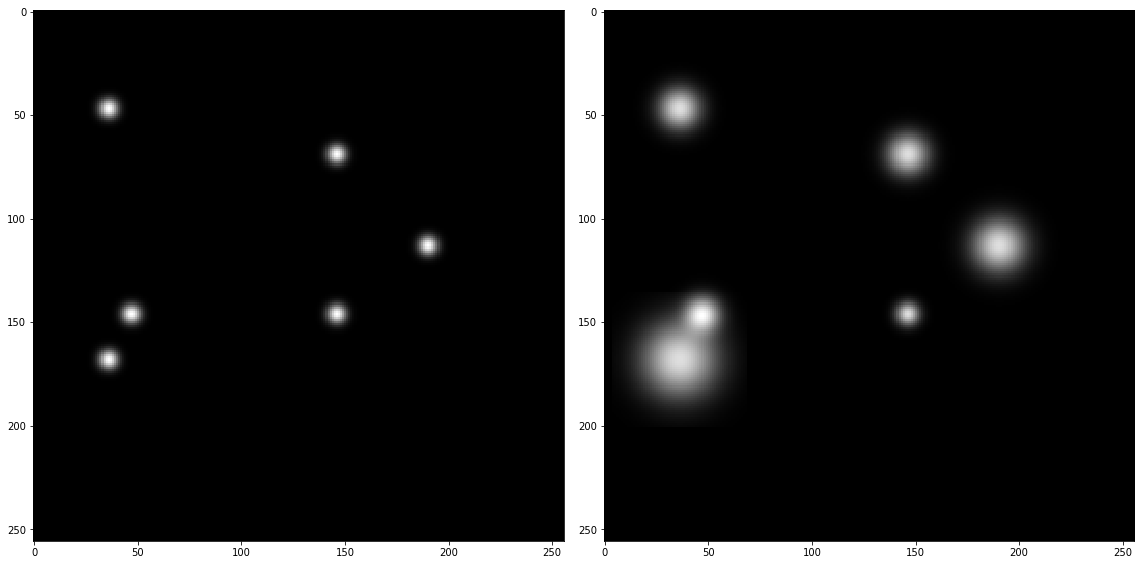

In [64]:
sample_id=8
fig1, axes1 = plt.subplots(1, 2, figsize=(16, 32))
axes1[0].imshow(dataset_loaded['sample-{0}/orig'.format(sample_id)], cmap="gray")
axes1[1].imshow(dataset_loaded['sample-{0}/noisy'.format(sample_id)], cmap="gray")
fig1.tight_layout()
plt.show()

In [236]:
np.linspace(0,999,10)

array([  0., 111., 222., 333., 444., 555., 666., 777., 888., 999.])